In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
# 数据加载
data = pd.read_csv('./car_price.csv')
data.head()
data['price'].describe()

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

In [4]:
#数值型数据转List
data = pd.read_csv('./car_price.csv')
ys=data[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']]
new=ys
ys=ys.values
ys=ys.tolist()
ys[1]

[88.6,
 168.8,
 64.1,
 48.8,
 2548.0,
 130.0,
 3.47,
 2.68,
 9.0,
 111.0,
 5000.0,
 21.0,
 27.0,
 16500.0]

In [15]:
# K-means、Scoef
Inport6=[18,20,42,75,125,128,74]



def createInitial(sample,D): # D is dataset and sample is a sample
    Set=[]
    for i in sample:
        a=[]
        a.append(D[i])
        Set.append(a)
    return Set
    
def InsertToSet(D,setA,b,Center): #b is  row vector , setA is setCluster , CenterC is CenterSet
    dismin=0
    minN=0
    for j in range(len(Center[0])):
        dismin=dismin+(Center[0][j]-b[j])*(Center[0][j]-b[j])
    
    for u in range(len(Center)):
        dis=0
        uu=Center[u]
        for j in range(len(uu)):
            dis=dis+(uu[j]-b[j])*(uu[j]-b[j])
        if dis<dismin and dis!=0:
            minN=u
    
    setA[minN].append(b)

def Caculcenter(setA):
    a=[]
    for set in setA:
        u=set[0]
        for i in range(1,len(set)):
            u =list(map(lambda x,y:x + y,u,set[i]))
        x_=[]
        for i in range(len(u)):
            x_.append(u[i]/len(set))
        u=x_
        a.append(u)
    return a

def SilCoef(dataA):
    Mcoef=0
    l=0
    for data in range(len(dataA)):
        tcoef=0
        tl=len(dataA[data])
        l=l+tl
        for j in range(len(dataA[data])):
            a=0
            b=0
            max=0
            for jj in range(len(dataA[data])):
                for k in range(len(dataA[data][j])):
                    a=a+(dataA[data][j][k]-dataA[data][jj][k])*(dataA[data][j][k]-dataA[data][jj][k])
            a=a/len(dataA[data])
            for k in range(len(dataA)):
                if k == j:
                    continue
                else:
                    start=0
                    temp=0
                    for kk in range(len(dataA[k])):
                        for kkk in range(len(dataA[k][kk])):
                            temp=temp+(dataA[k][kk][kkk]-dataA[data][j][kkk])*(dataA[k][kk][kkk]-dataA[data][j][kkk])
                    if start==0:
                        b=temp/len(dataA[k])
                        start=start+1
                    else:
                        if (temp/len(dataA[k]))>b:
                            b=(temp/len(dataA[k]))
            if a > b :
                max=a
            else:
                max=b
            
            tcoef=(b-a)/max    
            Mcoef=Mcoef+tcoef
       
    return Mcoef/l

def renewdata(D,Set): #D is dataset and S is already get cluster
    Dnew=[]
    for i in range(len(D)):
        start=0
        for j in range(len(Set)):
            for jj in range(len(Set[j])):
                if Set[j][jj]==D[i]:
                    start=start+1
        if start==0:
            Dnew.append(D[i])
    return Dnew
            
        
def kmeans(D,K,N):
    sample=Inport6
    set = createInitial(sample,D)
    D=renewdata(D,set)
    u=Caculcenter(set)
    p=[]
    for i in sample:
       p.append(D[i]) 
    
    for j in range(N):
        D=renewdata(D,set)
        for i in range(len(D)): 
            InsertToSet(D,set,D[i],u)
            u1=Caculcenter(set)
            if u == u1:
                break
            u=u1
            
    return set

set=kmeans(ys,6,200)

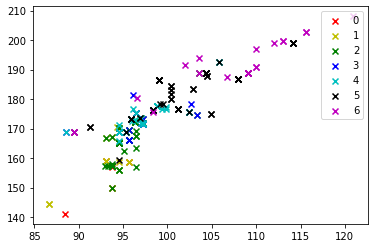

9 19 46 19 35 57 20


In [6]:
#散点图
def draw(C):
    colValue = ['r','y','g','b','c','k','m']
    for i in range(len(C)):
        coo_X=[]
        coo_Y=[]
        for j in range(len(C[i])):
            coo_X.append(C[i][j][0])
            coo_Y.append(C[i][j][1])
        plt.scatter(coo_X,coo_Y,marker='x',color=colValue[i%len(colValue)],label=i)
    plt.legend(loc='upper right')
    plt.show()
draw(set)
print(len(set[0]),len(set[1]),len(set[2]),len(set[3]),len(set[4]),len(set[5]),len(set[6]))

In [7]:
#计算轮廓系数
SilCoef(set)

0.844859603977704

In [8]:
#Label迁移
lab=[]
for i in range(len(ys)):
    start=0
    for j in range(len(set)):
        for k in range(len(set[j])):
            if start ==1:
                continue
            if ys[i]==set[j][k]:
                start=start+1
                lab.append(j)
        if start == 1:
            continue
            

            
a=[]
for i in data['CarName']:
    start=0
    fin=0
    for j in i:        
        if j ==' ':
            start=start+1
        if start==1:
            break  
        else:
            if fin==0:
                temp=j
                fin=fin+1
            else:
                temp=temp+j
    a.append(temp)
    
data['shortname']=a
data['label']=lab
data[['car_ID','CarName','shortname','label']]


,car_ID,CarName,shortname,label
0,1,alfa-romero giulia,alfa-romero,3
1,2,alfa-romero stelvio,alfa-romero,4
2,3,alfa-romero Quadrifoglio,alfa-romero,4
3,4,audi 100 ls,audi,4
4,5,audi 100ls,audi,4
...,...,...,...,...
200,201,volvo 145e (sw),volvo,5
201,202,volvo 144ea,volvo,5
202,203,volvo 244dl,volvo,6
203,204,volvo 246,volvo,6
